In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [2]:
ticker='TCS.NS'
period='1d'
start_date='2021-1-1'
end_date='2022-8-4'
data=yf.Ticker(ticker=ticker).history(period=period,start=start_date,end=end_date)['Close']
returns=data.pct_change().dropna()

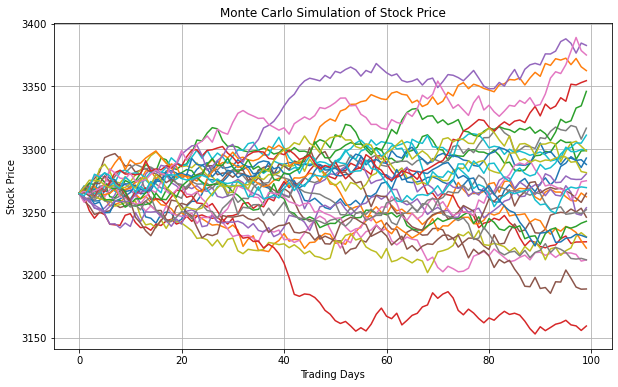

In [3]:
# Define parameters
initial_price =data[-1]  # Initial stock price
mu = returns.mean()  # Mean return
sigma =returns.std()  # Volatility (standard deviation)
num_simulations = 30  # Number of simulations
num_days = 100  # Number of trading days

# Generate an array of daily returns using a normal distribution
daily_returns = np.random.normal(mu/num_days, sigma/np.sqrt(num_days), (num_days, num_simulations))

# Create an array to store simulated prices
simulated_prices = np.zeros((num_days, num_simulations))
simulated_prices[0] = initial_price

# Perform the simulation
for i in range(1, num_days):
    simulated_prices[i] = simulated_prices[i-1] * (1 + daily_returns[i])

# Plot the simulated prices
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices)
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation of Stock Price')
plt.grid(True)
plt.show()


The graph shows how the probable performance of TCS under various market conditions. It can be clearly seern that the price fluctuates between 3225 and 3300 for most of the time hence the risk is of 25 rupees whereas most of the time it gives us return but for most of the simulations the trend of stock price is upwards(bullish) hence the probability of stock price going up is more than that of going down. hence we can conclude that TCS will either remain same or move upwards and is a good choice of investment and further analysis.

In [7]:
df=pd.DataFrame(simulated_prices)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,...,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826,3264.746826
1,3259.494232,3265.953634,3267.790089,3262.327028,3261.084941,3258.709493,3257.720474,3265.134333,3267.737797,3266.750186,...,3268.802350,3267.757836,3266.620010,3269.355198,3261.903577,3265.938271,3266.483817,3270.498297,3269.697215,3262.963717
2,3260.608528,3265.964471,3269.022929,3251.031107,3259.129868,3254.740120,3262.217025,3263.139998,3263.461918,3266.572005,...,3266.184599,3266.989941,3272.903492,3269.829650,3257.840057,3262.968005,3264.207717,3268.985682,3275.313178,3268.532266
3,3258.722188,3262.647462,3267.724239,3245.012952,3253.400729,3248.044865,3262.044584,3259.262780,3262.267696,3269.226615,...,3266.641933,3270.426793,3271.747393,3261.719866,3255.460490,3273.115372,3266.720640,3260.973871,3274.823505,3280.063907
4,3258.954866,3260.571278,3264.451864,3249.899190,3251.437126,3249.372742,3267.798812,3263.264502,3260.495567,3269.440000,...,3277.458687,3265.963179,3277.935135,3269.080922,3253.009262,3272.481617,3268.510827,3267.194628,3274.872277,3277.857013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3288.881194,3262.088055,3305.332695,3230.853111,3270.932445,3249.254268,3217.342491,3314.726688,3219.163534,3301.628877,...,3229.123254,3372.479181,3321.137247,3338.166870,3387.875600,3203.769211,3367.294211,3217.787495,3293.771186,3300.134297
96,3294.060454,3259.155587,3305.559589,3224.954932,3265.669359,3252.329804,3217.341650,3318.851237,3221.377993,3298.143508,...,3229.574512,3367.326342,3322.634549,3351.759118,3384.315997,3197.268504,3378.063682,3212.977014,3289.641625,3301.333722
97,3291.035404,3258.684551,3291.917929,3226.076756,3248.533604,3250.070196,3216.216345,3317.689886,3230.546392,3298.051103,...,3232.253338,3372.251429,3332.798783,3351.144971,3376.518835,3190.204588,3388.966175,3212.509223,3290.159937,3305.020595
98,3291.650927,3265.102579,3298.619424,3226.139524,3247.451610,3252.981835,3210.888667,3308.002946,3233.516703,3299.743918,...,3231.402837,3365.594830,3334.519806,3353.033076,3384.506613,3188.506466,3378.522862,3213.051441,3282.203418,3304.770374


In [13]:
df.to_csv('MonteCarlo.csv')